In [7]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import scipy.stats as st
import missingno as msno
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport
from sklearn import ensemble, tree, linear_model

pd.pandas.set_option('display.max_columns', None)

In [8]:
#Importing Dataset

df = pd.read_csv("/Users/sumedhaghosh/Documents/DSC-Assignment/DSC_Assignment/student_extended_ml_dataset2.csv")
df.head()

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low


In [10]:
#Finding Missing values

f_na = [f for f in df.columns if df[f].isnull().sum()>1]

for f in f_na:
    print(f, np.rpund(df[f].isnull().mean(),4), '% missing values')

In [11]:
#Finding Numerical Values

num_f = [f for f in df.columns if df[f].dtypes != 'O']

print('Number of numerical values: ', len(num_f))

df[num_f].head()

Number of numerical values:  7


,Age,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job
0,19,8.140821,92,87,43,85,True
1,35,9.825626,112,86,81,54,False
2,33,8.835372,131,87,52,57,True
3,33,2.482483,138,70,86,83,False
4,28,4.419793,90,95,48,83,True


In [13]:
#Finding unique Values for Age

print(df['Age'].unique())

[19 35 33 28 32 27 39 41 43 30 38 22 45 20 23 40 29 26 42 25 44 36 37 31
 18 34 21 24]


In [15]:
#Finding Repeated Values Count

age_count = df['Age'].value_counts()
print(age_count)



Age
19    200
18    198
23    198
38    196
30    194
27    192
34    192
35    191
39    187
22    186
45    183
42    180
32    178
20    177
37    177
41    175
43    175
44    174
40    173
28    172
25    172
36    165
21    165
24    163
33    162
29    162
31    157
26    156
Name: count, dtype: int64


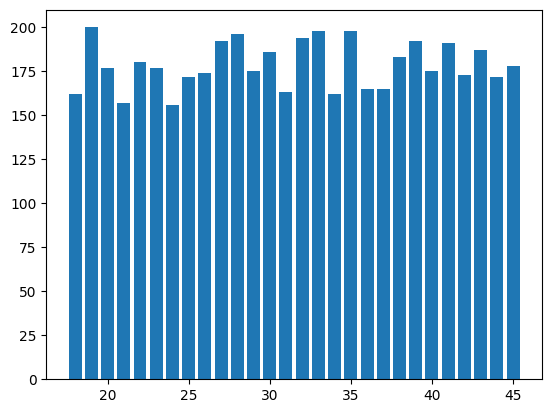

In [40]:
#Pkotting the Age Count

age = df['Age'].unique()
age_num = age_count.tolist()
plt.bar(age, age_num)
plt.show()

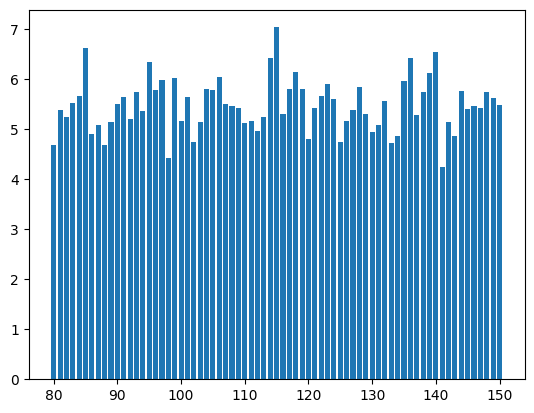

In [55]:
iq = df['IQ'].unique()
hrs = df.groupby('IQ')['Hours_Studied'].median()
plt.bar(iq,hrs)
plt.show()

([<matplotlib.patches.Wedge at 0x141cc9fa0>,
 [Text(0.7048873591947369, 0.8444725044946519, 'High Stduy Group Hours with Part Time Job'),
  Text(-0.8554402354511623, 0.6915359741700068, 'Low Study Group Hours with Part Time Job'),
  Text(-0.6904604724056724, -0.8563085518931456, 'High Study Group Hours with No Part Time job'),
  Text(0.8453576070958705, -0.7038256290624434, 'Low Study Group Hours with No Part Time Job')])

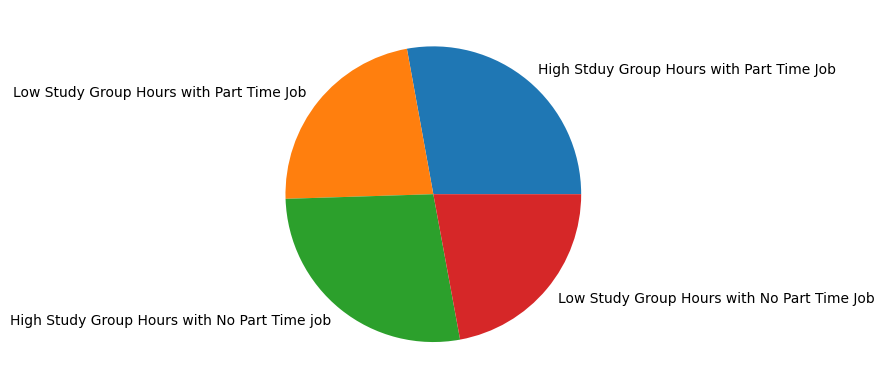

In [98]:
job_t = df.groupby('Has_Part_Time_Job').get_group(True)
job_f = df.groupby('Has_Part_Time_Job').get_group(False)
grp_std_h_job = job_t.groupby('Study_Hours_Group').get_group('High').count()
grp_std_l_job = job_t.groupby('Study_Hours_Group').get_group('Low').count()
grp_std_h_job_n = job_f.groupby('Study_Hours_Group').get_group('High').count()
grp_std_l_job_n = job_f.groupby('Study_Hours_Group').get_group('Low').count()

val = [grp_std_h_job.tolist()[0],grp_std_l_job.tolist()[0],grp_std_h_job_n.tolist()[0],grp_std_l_job_n.tolist()[0]]
lab = ['High Stduy Group Hours with Part Time Job','Low Study Group Hours with Part Time Job','High Study Group Hours with No Part Time job', 'Low Study Group Hours with No Part Time Job']

plt.pie(val, labels = lab)

/Users/sumedhaghosh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sumedhaghosh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


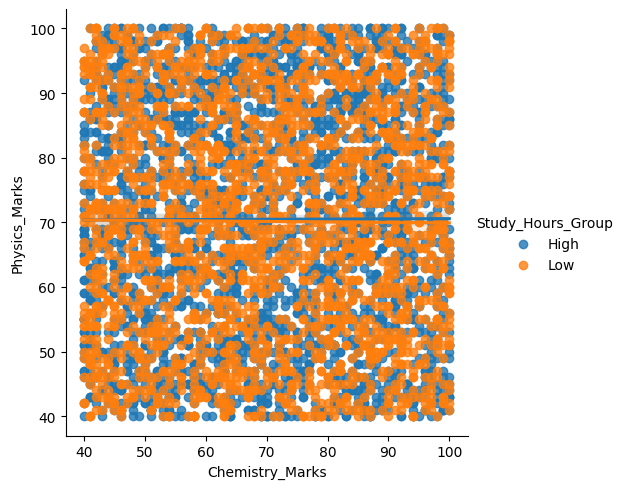

In [127]:
phy = df['Physics_Marks'].unique().tolist()
maths = df['Math_Marks'].unique().tolist()
chem = df['Chemistry_Marks'].unique().tolist()

hrs = df['Hours_Studied'].tolist()

sns.lmplot(x = 'Chemistry_Marks', y = 'Physics_Marks', hue = 'Study_Hours_Group', data = df.loc[df['Study_Hours_Group'].isin(['High','Low'])] )
plt.show()

/Users/sumedhaghosh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sumedhaghosh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


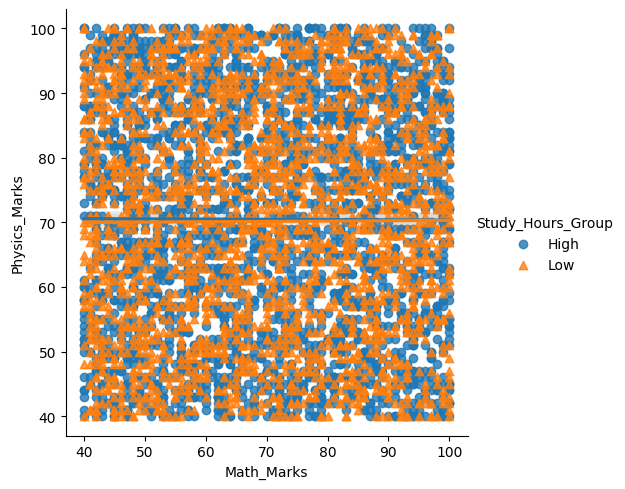

In [128]:
sns.lmplot(x = 'Math_Marks', y = "Physics_Marks", hue = "Study_Hours_Group",data = df.loc[df["Study_Hours_Group"].isin(['High',"Low"])])